In [10]:
import meshio
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def create_mesh(mesh, cell_type, prune_z=False):
    cells = mesh.get_cells_type(cell_type)
    cell_data = mesh.get_cell_data("gmsh:physical", cell_type)
    out_mesh = meshio.Mesh(points=mesh.points, cells={cell_type: cells}, cell_data={"name_to_read":[cell_data]})
    if prune_z:
        out_mesh.prune_z_0()
    return out_mesh

In [12]:
def gmsh_to_xdmf_2D(mesh, name):
    line_mesh = create_mesh(mesh, "line", prune_z=True)
    meshio.write(name + "_facets_2d.xdmf", line_mesh)

    triangle_mesh = create_mesh(mesh, "triangle", prune_z=True)
    meshio.write(name + "_mesh_2d.xdmf", triangle_mesh)

In [13]:
msh = meshio.read("Plate_with_hole3.msh")
# for key in msh.cell_data_dict["gmsh:physical"].keys():
#     if key == "triangle":
#         triangle_data = msh.cell_data_dict["gmsh:physical"][key]
#     elif key == "tetra":
#         tetra_data = msh.cell_data_dict["gmsh:physical"][key]
# for cell in msh.cells:
#     if cell.type == "tetra":
#         tetra_cells = cell.data
#     elif cell.type == "triangle":
#         triangle_cells = cell.data
# tetra_mesh = meshio.Mesh(points=msh.points, cells={"tetra": tetra_cells},
#                          cell_data={"name_to_read":[tetra_data]})
# triangle_mesh =meshio.Mesh(points=msh.points,
#                            cells=[("triangle", triangle_cells)],
#                            cell_data={"name_to_read":[triangle_data]})
# meshio.write("plate.xdmf", tetra_mesh)
# meshio.write("mf.xdmf", triangle_mesh)

gmsh_to_xdmf_2D(msh, "Plate_with_hole")

# set_log_level(LogLevel.ERROR)



# mvc2 = MeshValueCollection("size_t", mesh, 3)
# with XDMFFile("plate.xdmf") as infile:
#     infile.read(mvc2, "name_to_read")
# cf = cpp.mesh.MeshFunctionSizet(mesh, mvc2)

# ds_top = Measure("ds", domain=mesh, subdomain_data=mf, subdomain_id=1)
# ds_right = Measure("ds", domain=mesh, subdomain_data=mf, subdomain_id=7)
# dx_volume = Measure("dx", domain=mesh, subdomain_data=cf, subdomain_id=12)
msh

<meshio mesh object>
  Number of points: 116
  Number of cells:
    line: 39
    triangle: 193
  Cell data: gmsh:physical, gmsh:geometrical

In [14]:
mesh = Mesh()
with XDMFFile("Plate_with_hole_mesh_2d.xdmf") as infile:
    infile.read(mesh)
mvc = MeshValueCollection("size_t", mesh, 1)

with XDMFFile("Plate_with_hole_facets_2d.xdmf") as infile:
    infile.read(mvc)
fd = MeshFunction("size_t", mesh, mvc)
ds = Measure('ds', domain=mesh, subdomain_data=fd)


In [15]:
print(mesh.geometric_dimension(), mesh.num_faces(), mesh.num_facets(), 'v=', mesh.num_vertices(), mesh.num_cells(), mesh.num_edges(), mesh.num_entities(1), mesh.num_entities_global(2))

2 193 309 v= 116 193 309 309 193


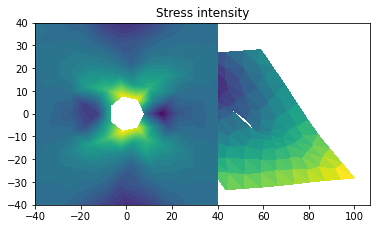

In [16]:
# import meshio
# from dolfin import *
# from __future__ import print_function
# from fenics import *
# import matplotlib.pyplot as plt


from ufl import nabla_grad
from ufl import nabla_div

# import json
# from Full3DUtilities import *

# with open("Open_wellbore.json", "r") as read_file:
#     data = json.load(read_file)

# R = data["geometry"]["wellbore_radius"]
E = 25
nu = 0.2
P = 50
# phi = data["parameters"]["azimuthal_angle"]
# theta = data["parameters"]["polar_angle"]

# sig11 = data["parameters"]["in_situ_stresses_max"]
# sig22 = data["parameters"]["in_situ_stresses_min"]
# sig12 = 0

mu_ = E/(2*(1+nu))
lambda_ = E*nu/((1+nu)*(1-2*nu))
# P = 40
# sigma = np.array([
#     [-data["parameters"]["in_situ_stresses_max"], 0, 0],
#     [0, -data["parameters"]["in_situ_stresses_min"], 0],
#     [0, 0, -data["parameters"]["in_situ_stresses_zz"]],
# ])
# print(rotateStress(stress=sigma, phi=phi, theta=theta))

# sigma_inf = { 'xx':sigma[0][0], 'xy':sigma[0][1], 'xz':sigma[0][2],
#               'yy':sigma[1][1], 'yz':sigma[1][2], 'zz':sigma[2][2] }

# print(R)
# x = R 
# y = 0
# print(sigmaXX(x, y, R, sigma_inf, P))
# # sig11 = sigma_inf[0][0]
# # sig22 = sigma_inf[0][0]
# # sig11 = sigma_inf[0][0]
# # sig11 = sigma_inf[0][0]
# # sig11 = sigma_inf[0][0]

# x = SpatialCoordinate(mesh)

# s_tmp = x[0]

# sigma_BC = as_tensor([[sigmaXX(x[0], x[1], R, sigma_inf, P), sigmaXY(x[0], x[1], R, sigma_inf, P), sigmaXZ(x[0], x[1], R, sigma_inf, P)],
#                       [sigmaXY(x[0], x[1], R, sigma_inf, P), sigmaYY(x[0], x[1], R, sigma_inf, P), sigmaYZ(x[0], x[1], R, sigma_inf, P)],
#                       [sigmaXZ(x[0], x[1], R, sigma_inf, P), sigmaYZ(x[0], x[1], R, sigma_inf, P), sigmaZZ(x[0], x[1], R, sigma_inf, P, nu)]])

# # mesh = BoxMesh(Point(0, 0, 0), Point(L, W, W), 10, 3, 3)
V = VectorFunctionSpace(mesh, 'P', 1)

# # Define boundary condition
# tol = 1E-14

# def clamped_boundary(x, on_boundary):
#     return on_boundary and x[0]*x[0] + x[1]*x[1] < R*R+tol

# bc = DirichletBC(V, Constant((0, 0, 0)), clamped_boundary)

# # Define strain and stress

def epsilon(u):
    return 0.5*(nabla_grad(u) + nabla_grad(u).T)
    #return sym(nabla_grad(u))

def sigma(u):
    return lambda_*nabla_div(u)*Identity(d) + 2*mu_*epsilon(u)

# Define variational problem
u = TrialFunction(V)
d = u.geometric_dimension()  # space dimension
v = TestFunction(V)
n = FacetNormal(mesh)
# T = dot(Co, n)
sigXXN = Constant((-50, 0, 0))
sigYYN = Constant((0, -40, 0))
sigma_inf = as_tensor([ [Constant((-50)), 0],
                        [0, Constant((-40))] ])
sigma_hydrostat = as_tensor([ [Constant((-P)), 0],
                        [0, Constant((-P))] ])

a = inner(sigma(u), epsilon(v))*dx
L = dot( dot(sigma_inf, n), v)*ds(2) + dot( dot(sigma_hydrostat, n), v)*ds(1) 
# # L = dot(T, v)*ds(1) + dot(T, v)*ds(2) + dot(T, v)*ds(3) + dot(T, v)*ds(4) + dot(T, v)*ds(5) + dot(T, v)*ds(6)
# print(type(n), type(s_tmp))
# Compute solution
u = Function(V)
solve(a == L, u)

# Plot solution
plot(u, title='Displacement', mode='displacement')

# # Plot stress
s = sigma(u) - (1./3)*tr(sigma(u))*Identity(d)  # deviatoric stress
von_Mises = sqrt(3./2*inner(s, s))
V = FunctionSpace(mesh, 'P', 1)
von_Mises = project(von_Mises, V)
plot(von_Mises, title='Stress intensity')

Ve_quad = VectorElement("Quadrature", mesh.ufl_cell(), degree=1, dim=3, quad_scheme='default')
V_quad = FunctionSpace(mesh, Ve_quad)

# Vse = FiniteElement("Quadrature", mesh.ufl_cell(), degree=3, quad_scheme='default')
# Vs = FunctionSpace(mesh, Vse)
# test_stress = project(u[0], Vs, form_compiler_parameters={"quadrature_degree":3})
# stresses = project( as_vector([sigma(u)[0,0], sigma(u)[1,1], sigma(u)[0,1]]), V_quad )
# stresses = project( as_vector([u[0], u[1], u[1]]), V_quad )
# # Compute magnitude of displacement
# u_magnitude = sqrt(dot(u, u))
# u_magnitude = project(u_magnitude, V)
# plot(u_magnitude, 'Displacement magnitude')
# print('min/max u:',
#       u_magnitude.vector().get_local().min(),
#       u_magnitude.vector().get_local().max())

# # Save solution to file in VTK format
File('elasticity/displacement.pvd') << u
File('elasticity/von_mises.pvd') << von_Mises
# File('elasticity/magnitude.pvd') << u_magnitude

# Hold plot
# interactive()



In [17]:
u.vector().get_local().shape

(232,)

In [18]:
ux, uy = u.split(deepcopy=True)
ux.vector().get_local().shape

(116,)

In [19]:
print(ux.vector().get_local().max(), ux.vector().get_local().min())

139.96206922775897 -37.37798410473169


In [20]:
print(ux.compute_vertex_values().max(), ux.compute_vertex_values().min())

139.96206922775897 -37.37798410473169


In [64]:
V.tabulate_dof_coordinates().shape

(116, 2)

In [22]:
test_stress = project(sigma(u)[0,0], Vs)

NameError: name 'Vs' is not defined

In [13]:
ux.vector().get_local().shape

(116,)

In [16]:
N = ux.vector().get_local().shape[0]
u = ux.vector().get_local().reshape(int(N/2), int(N/2))

ValueError: cannot reshape array of size 116 into shape (58,58)

In [50]:
from keras.layers import Dense, Input, Concatenate
from keras.models import Model
# from keras.utils import to_categorical
# from keras.utils.vis_utils import plot_model
import keras.backend as K
from sklearn.preprocessing import MinMaxScaler

from keras.callbacks import TensorBoard

In [9]:
input_x = Input(shape = (1, ))
input_y = Input(shape = (1, ))
united_input = Concatenate()([input_x, input_y])
layer = Dense(units = 8, activation='relu')(united_input)
layer = Dense(units = 16, activation='relu')(layer)
layer = Dense(units = 16, activation='relu')(layer)
layer = Dense(units = 32, activation='relu')(layer)
layer = Dense(units = 32, activation='relu')(layer)
layer = Dense(units = 64, activation='relu')(layer)
layer = Dense(units = 64, activation='relu')(layer)
layer = Dense(units = 32, activation='relu')(layer)
layer = Dense(units = 32, activation='relu')(layer)
layer = Dense(units = 16, activation='relu')(layer)
layer = Dense(units = 16, activation='relu')(layer)
layer = Dense(units = 8, activation='relu')(layer)

output_u = Dense(units=1, activation='relu')(layer)

model = Model([input_x, input_y], output_u)
model.summary()

model.compile(optimizer = "adam", loss='mean_squared_error')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 2)            0           input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 8)            24          concatenate_1[0][0]          

In [61]:
U = ux.compute_vertex_values()
x, y = zip( *(V.tabulate_dof_coordinates()) )
x_train = np.asarray(x)
y_train = np.asarray(y)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train.reshape(-1,1))
y_train = scaler.fit_transform(y_train.reshape(-1,1))
U_train = scaler.fit_transform(U.reshape(-1,1))

In [63]:
history = model.fit([x_train, y_train], U_train, epochs = 50)

s 21ms/step - loss: 112.0695
Epoch 3/250
4/4 [==============================] - 0s 15ms/step - loss: 0.3195
Epoch 4/250
4/4 [==============================] - 0s 19ms/step - loss: 0.2611
Epoch 5/250
4/4 [==============================] - 0s 35ms/step - loss: 0.1676
Epoch 6/250
4/4 [==============================] - 0s 52ms/step - loss: 0.1083
Epoch 7/250
4/4 [==============================] - 0s 14ms/step - loss: 0.0788
Epoch 8/250
4/4 [==============================] - 0s 35ms/step - loss: 0.0708
Epoch 9/250
4/4 [==============================] - 0s 28ms/step - loss: 0.0622
Epoch 10/250
4/4 [==============================] - 0s 23ms/step - loss: 0.0574
Epoch 11/250
4/4 [==============================] - 0s 8ms/step - loss: 0.0538
Epoch 12/250
4/4 [==============================] - 0s 46ms/step - loss: 0.0549
Epoch 13/250
4/4 [==============================] - 0s 9ms/step - loss: 0.0558
Epoch 14/250
4/4 [==============================] - 0s 18ms/step - loss: 0.0553
Epoch 15/250
4/4 [==